In [24]:
import pandas as pd
import numpy as np
import datetime


In [10]:
N = 10
df = pd.DataFrame({ 'A' : range(1, 100 + 1 ,1)})

In [12]:
df.head(10)

,A
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [13]:
df['shifted'] = df['A'].shift(1)

In [14]:
df.head(10)

,A,shifted
0,1,NaN
1,2,1.0
2,3,2.0
3,4,3.0
4,5,4.0
5,6,5.0
6,7,6.0
7,8,7.0
8,9,8.0
9,10,9.0


In [15]:
type(df['A'].shift(1))

pandas.core.series.Series

In [21]:
type(df['shifted'].fillna(1))

pandas.core.series.Series

In [30]:
time = datetime.datetime.now()
print(time)

2017-07-27 16:39:07.216901


In [31]:
time.hour

16

In [33]:
import ggplot

/Users/ericpeterson/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/ericpeterson/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/ericpeterson/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [71]:
from ggplot import *
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [72]:
p = ggplot(aes(x='date', y='beef'), data=meat) + geom_point() 

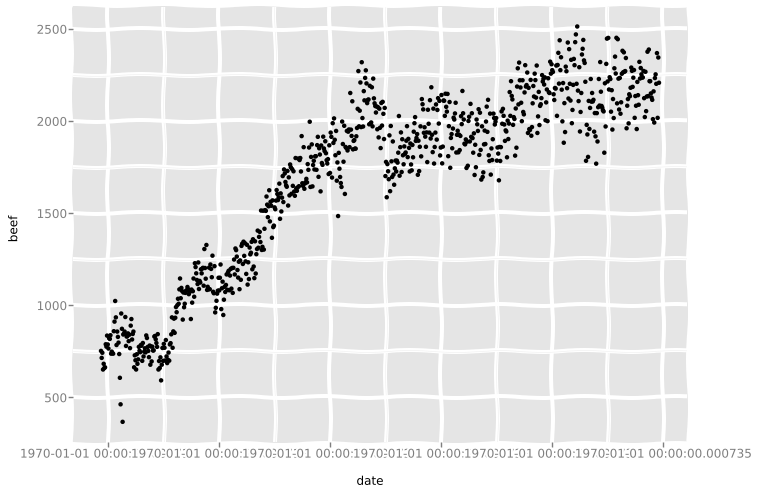

<ggplot: (305781245)>

In [73]:
p

In [87]:
import pandas
%matplotlib inline
import seaborn as sns


In [90]:
from ggplot import *
data = pandas.read_csv("https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv")
print(data.columns.values)
data['datetime'] = data['DATEn'] + " " + data['TIMEn']
data['datetime'] =  pandas.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
data['weekday'] = data['datetime'].dt.weekday_name
data['weekday'].describe()


['Unnamed: 0' 'UNIT' 'DATEn' 'TIMEn' 'Hour' 'DESCn' 'ENTRIESn_hourly'
 'EXITSn_hourly' 'maxpressurei' 'maxdewpti' 'mindewpti' 'minpressurei'
 'meandewpti' 'meanpressurei' 'fog' 'rain' 'meanwindspdi' 'mintempi'
 'meantempi' 'maxtempi' 'precipi' 'thunder']


count     131951
unique         7
top       Monday
freq       22242
Name: weekday, dtype: object

In [95]:
data_pivoted = data.groupby(['weekday'])['ENTRIESn_hourly'].sum()
data_pivoted.head(20)


weekday
Friday       23130773.0
Monday       24130096.0
Saturday     14044105.0
Sunday       13180114.0
Thursday     23486649.0
Tuesday      22997954.0
Wednesday    23562636.0
Name: ENTRIESn_hourly, dtype: float64

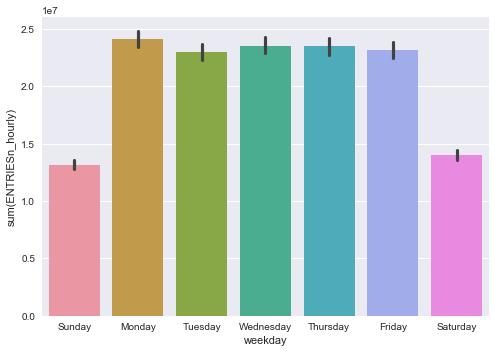

In [102]:
g = sns.barplot(x='weekday', y='ENTRIESn_hourly', data=data, estimator=sum)
g